In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [81]:
# plt.rcParams['figure.figsize'] = [15,8]

In [82]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
A=pd.read_csv('car_sales.csv',index_col=0)
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [85]:
A.shape

(93, 27)

In [86]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [87]:
A.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


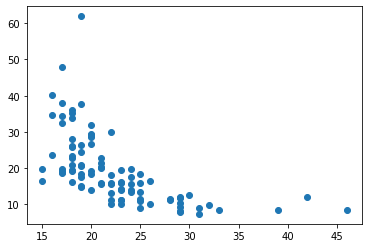

In [88]:
plt.scatter(A['MPG.city'],A['Price'])

<AxesSubplot:title={'center':'Price'}, xlabel='Passengers'>

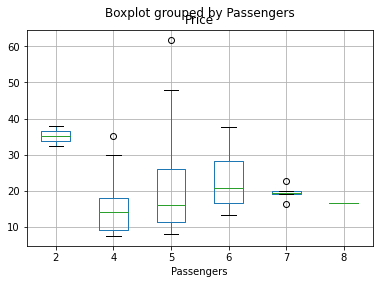

In [89]:
A.boxplot(column='Price',by='Passengers')
# categorical variable(seat) has non linear relationship with y(price)
# if it had then the linearity wouldve been observerd(more seat =more price)

<AxesSubplot:title={'center':'Price'}, xlabel='Cylinders'>

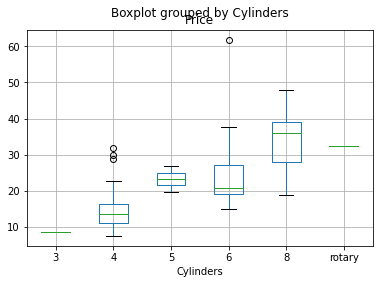

In [90]:
A.boxplot(column='Price',by='Cylinders')

<AxesSubplot:title={'center':'Price'}, xlabel='Origin'>

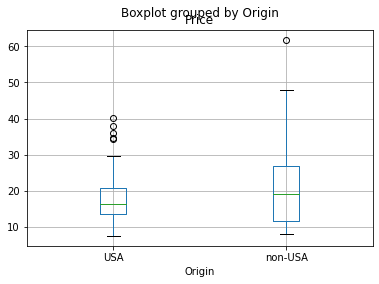

In [91]:
A.boxplot(column='Price',by='Origin')

<AxesSubplot:title={'center':'Price'}, xlabel='AirBags'>

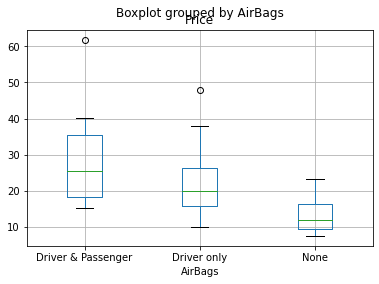

In [92]:
A.boxplot(column='Price',by='AirBags')
# it has Linear Relationship

In [93]:
A['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Man.trans.avail'>

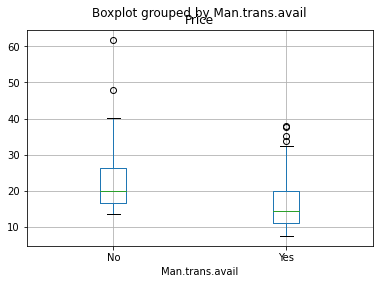

In [94]:
A.boxplot(column='Price',by='Man.trans.avail')

<AxesSubplot:title={'center':'Price'}, xlabel='DriveTrain'>

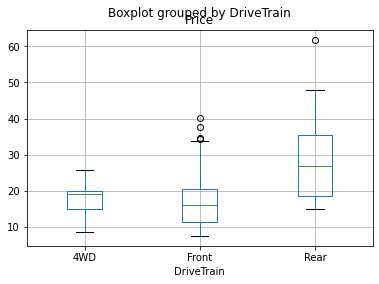

In [95]:
A.boxplot(column='Price',by='DriveTrain')

In [96]:
#Bigdata (10K to 100K) = dropna
#Dataset size (500-2000)upto 5-10% of size of n = Median Imputation or random sampling
#Dataset around 1000, 10-20% of record is missing = KNN Imputer (preserve your distribution)

In [7]:
A['Rear.seat.room'].fillna(A['Rear.seat.room'].median(),inplace=True)
A['Luggage.room'].fillna(A['Luggage.room'].median(),inplace=True)

In [98]:
test=pd.DataFrame({'x1':[3,8,np.nan,5,10],'x2':[5,2,7,8,9],'x3':[np.nan,9,8,2,5]})
test

,x1,x2,x3
0,3.0,5,NaN
1,8.0,2,9.0
2,NaN,7,8.0
3,5.0,8,2.0
4,10.0,9,5.0


In [99]:
from sklearn.impute import KNNImputer
#by default it is recursive

In [100]:
Imp=KNNImputer(n_neighbors=2)
Imp.fit_transform(test)

array([[ 3. ,  5. ,  5. ],
       [ 8. ,  2. ,  9. ],
       [ 6.5,  7. ,  8. ],
       [ 5. ,  8. ,  2. ],
       [10. ,  9. ,  5. ]])

In [101]:
#using KNN imputer (n_neigh=2)
#test-1=8
#test-3=5
#test-4=11

In [8]:
A['Rear.seat.room'].fillna(0,inplace=True)
A['Luggage.room'].fillna(0,inplace=True)

In [9]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [104]:
A['Passengers']=A['Passengers'].astype('object')

In [105]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [10]:
#Create a B data frame by dropping unwanted columns based on business context
B=A.drop(['Manufacturer','Model','Min.Price','Max.Price','Price','Make'],axis=1)
B.head()

,Type,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,Small,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,Midsize,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,Compact,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,Midsize,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,Midsize,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [107]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                93 non-null     object 
 1   MPG.city            93 non-null     int64  
 2   MPG.highway         93 non-null     int64  
 3   AirBags             93 non-null     object 
 4   DriveTrain          93 non-null     object 
 5   Cylinders           93 non-null     object 
 6   EngineSize          93 non-null     float64
 7   Horsepower          93 non-null     int64  
 8   RPM                 93 non-null     int64  
 9   Rev.per.mile        93 non-null     int64  
 10  Man.trans.avail     93 non-null     object 
 11  Fuel.tank.capacity  93 non-null     float64
 12  Passengers          93 non-null     object 
 13  Length              93 non-null     int64  
 14  Wheelbase           93 non-null     int64  
 15  Width               93 non-null     int64  
 16  Turn.circl

In [11]:
df_num = B.select_dtypes(include = [np.number])
df_num.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
2,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
4,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
5,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640


In [12]:
df_cat = B.select_dtypes(include = [np.object])
df_cat.head()

,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
1,Small,None,Front,4,Yes,non-USA
2,Midsize,Driver & Passenger,Front,6,Yes,non-USA
3,Compact,Driver only,Front,6,Yes,non-USA
4,Midsize,Driver & Passenger,Front,6,Yes,non-USA
5,Midsize,Driver only,Rear,4,Yes,non-USA


In [110]:
df_cat['Type'].value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [13]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
dummy_var.head()

,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Origin_non-USA
1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1
2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1
5,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1


In [17]:
exp=setup(df_num,target=A[['Price']],categorical_features=dummy_var)

TypeError: unhashable type: 'DataFrame'

In [112]:
X = pd.concat([df_num, dummy_var], axis = 1)
X.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,...,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,25,31,1.8,140,6300,2890,13.2,177,102,68,...,0,0,0,1,0,1,0,0,0,1
2,18,25,3.2,200,5500,2335,18.0,195,115,71,...,1,0,0,1,0,1,0,0,0,1
3,20,26,2.8,172,5500,2280,16.9,180,102,67,...,1,0,0,1,0,1,0,0,0,1
4,19,26,2.8,172,5500,2535,21.1,193,106,70,...,1,0,0,1,0,0,1,0,0,1
5,22,30,3.5,208,5700,2545,21.1,186,109,69,...,0,0,0,1,1,0,0,0,0,1


In [113]:
Y=A['Price']

In [114]:
X.shape,Y.shape

((93, 35), (93,))

In [115]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [116]:
Xc=sm.add_constant(X)

In [117]:
Xc.head()

,const,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,...,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,1.0,25,31,1.8,140,6300,2890,13.2,177,102,...,0,0,0,1,0,1,0,0,0,1
2,1.0,18,25,3.2,200,5500,2335,18.0,195,115,...,1,0,0,1,0,1,0,0,0,1
3,1.0,20,26,2.8,172,5500,2280,16.9,180,102,...,1,0,0,1,0,1,0,0,0,1
4,1.0,19,26,2.8,172,5500,2535,21.1,193,106,...,1,0,0,1,0,0,1,0,0,1
5,1.0,22,30,3.5,208,5700,2545,21.1,186,109,...,0,0,0,1,1,0,0,0,0,1


In [118]:
model = sm.OLS(Y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     10.06
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.77e-14
Time:                        11:41:13   Log-Likelihood:                -252.59
No. Observations:                  93   AIC:                             575.2
Df Residuals:                      58   BIC:                             663.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 110.8270     35.770      3.098      0.003      39.226     182.428
MPG.city               -0.3244      0.432     -0.750      0.456      -1.190       0.541
MPG.highway             0.1691      0.398      0.425      0.672      -0.627       0.965
EngineSize             -1.6774      2.828     -0.593      0.555      -7.337       3.983
Horsepower              0.1388      0.045      3.088      0.003       0.049       0.229
RPM                    -0.0026      0.002     -1.169      0.247      -0.007       0.002
Rev.per.mile            0.0017      0.002      0.771      0.444      -0.003       0.006
Fuel.tank.capacity      0.4672      0.540      0.865      0.391      -0.614       1.549
Length                  0.0485      0.110      0.443      0.660      -0.171       0.268
Wheelbase               0.3850      0.274      1.407      0.165      -0.163       0.933
Width                  -1.9087      0.544     -3.511      0.001      -2.997      -0.820
Turn.circle            -0.6224      0.365     -1.703      0.094      -1.354       0.109
Rear.seat.room          0.3343      0.359      0.932      0.355      -0.384       1.053
Luggage.room            0.2737      0.339      0.808      0.423      -0.405       0.952
Weight                 -0.0013      0.006     -0.237      0.813      -0.013       0.010
Type_Large              1.5368      4.227      0.364      0.718      -6.925       9.999
Type_Midsize            3.9322      2.457      1.601      0.115      -0.986       8.850
Type_Small              1.1903      2.657      0.448      0.656      -4.129       6.509
Type_Sporty             6.5059      3.371      1.930      0.059      -0.242      13.254
Type_Van                3.6835      7.196      0.512      0.611     -10.722      18.089
AirBags_Driver only    -3.7364      1.897     -1.970      0.054      -7.533       0.060
AirBags_None           -8.3008      2.181     -3.806      0.000     -12.666      -3.936
DriveTrain_Front        2.2805      2.297      0.993      0.325      -2.318       6.879
DriveTrain_Rear         7.2573      2.915      2.490      0.016       1.423      13.092
Cylinders_4            -2.1621      4.446     -0.486      0.629     -11.061       6.737
Cylinders_5            -3.5966      6.722     -0.535      0.595     -17.052       9.859
Cylinders_6             0.8184      5.614      0.146      0.885     -10.419      12.056
Cylinders_8             3.4500      6.832      0.505      0.616     -10.226      17.126
Cylinders_rotary      -15.0831     12.735     -1.184      0.241     -40.576      10.410
Man.trans.avail_Yes    -1.9656      2.167     -0.907      0.368      -6.303       2.372
Passengers_4           -5.4956      7.065     -0.778      0.440     -19.638       8.646
Passengers_5           -2.3710      7.490     -0.317      0.753     -17.363      12.621
Pas

In [119]:
from sklearn.model_selection import cross_val_score,KFold

In [120]:
cols = list(X.columns)
cols

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight',
 'Type_Large',
 'Type_Midsize',
 'Type_Small',
 'Type_Sporty',
 'Type_Van',
 'AirBags_Driver only',
 'AirBags_None',
 'DriveTrain_Front',
 'DriveTrain_Rear',
 'Cylinders_4',
 'Cylinders_5',
 'Cylinders_6',
 'Cylinders_8',
 'Cylinders_rotary',
 'Man.trans.avail_Yes',
 'Passengers_4',
 'Passengers_5',
 'Passengers_6',
 'Passengers_7',
 'Passengers_8',
 'Origin_non-USA']

In [121]:
p = pd.Series(model.pvalues.values[1:],index = cols) 
p   

MPG.city               0.456208
MPG.highway            0.672406
EngineSize             0.555333
Horsepower             0.003090
RPM                    0.247042
Rev.per.mile           0.443602
Fuel.tank.capacity     0.390792
Length                 0.659612
Wheelbase              0.164665
Width                  0.000872
Turn.circle            0.093906
Rear.seat.room         0.355425
Luggage.room           0.422625
Weight                 0.813446
Type_Large             0.717532
Type_Midsize           0.114914
Type_Small             0.655873
Type_Sporty            0.058502
Type_Van               0.610702
AirBags_Driver only    0.053615
AirBags_None           0.000342
DriveTrain_Front       0.324955
DriveTrain_Rear        0.015668
Cylinders_4            0.628581
Cylinders_5            0.594660
Cylinders_6            0.884602
Cylinders_8            0.615501
Cylinders_rotary       0.241107
Man.trans.avail_Yes    0.368069
Passengers_4           0.439801
Passengers_5           0.752702
Passenge

In [122]:
pmax = max(p)
pmax

0.9416850917337998

In [123]:
p.idxmax()

'Passengers_7'

In [124]:
cols.remove(p.idxmax())

In [125]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(Y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Horsepower', 'Fuel.tank.capacity', 'Wheelbase', 'Width', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear']


In [126]:
X_new=X[selected_features]
X_new.head()

,Horsepower,Fuel.tank.capacity,Wheelbase,Width,Type_Midsize,AirBags_Driver only,AirBags_None,DriveTrain_Rear
1,140,13.2,102,68,0,0,1,0
2,200,18.0,115,71,1,0,0,0
3,172,16.9,102,67,0,1,0,0
4,172,21.1,106,70,1,0,0,0
5,208,21.1,109,69,1,1,0,1


In [127]:
LR=LinearRegression()
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=3,shuffle=True,random_state=0) #explicit definition
rmse=cross_val_score(LR,X_new,Y,cv=kf,scoring='neg_root_mean_squared_error')
rmse_avg=np.mean(np.abs(rmse))
rmse_sd=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 5.065193476244539
Var_Error 0.994297948644457


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV


In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
sc=StandardScaler()

In [131]:
X_std=sc.fit_transform(X_new)

In [132]:
knn=KNeighborsRegressor()
hyp_par={'n_neighbors':np.arange(2,20),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(knn,hyp_par,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [133]:
GS.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [135]:
knn_tuned=KNeighborsRegressor(n_neighbors=14,weights='distance')

In [136]:
rmse=cross_val_score(knn_tuned,X_std,Y,cv=kf,scoring='neg_root_mean_squared_error')
rmse_avg=np.mean(np.abs(rmse))
rmse_sd=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)


Bias_Error 6.350640162684187
Var_Error 2.0427639589566953


In [138]:
6.35-2.04

4.31

In [57]:
GB_bias=[]
GB_ve=[]
for n in np.arange(1,100):
  GB=GradientBoostingRegressor(n_estimators=n,random_state=0)
  scores=cross_val_score(GB,X_std,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  GB_bias.append(np.mean(rmse))
  GB_ve.append((np.std(rmse,ddof=1)))


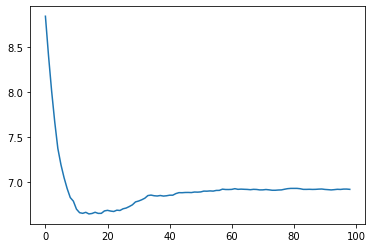

In [58]:
x_axis=np.arange(len(GB_bias))
plt.plot(x_axis,GB_bias)

In [59]:
np.argmin(GB_bias)

14

In [60]:
ABLR_BE=[]
for n in np.arange(1,100):
  ABLR=AdaBoostRegressor(base_estimator=LR,n_estimators=n,random_state=0)
  scores=cross_val_score(ABLR,X_std,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  ABLR_BE.append(np.mean(rmse))

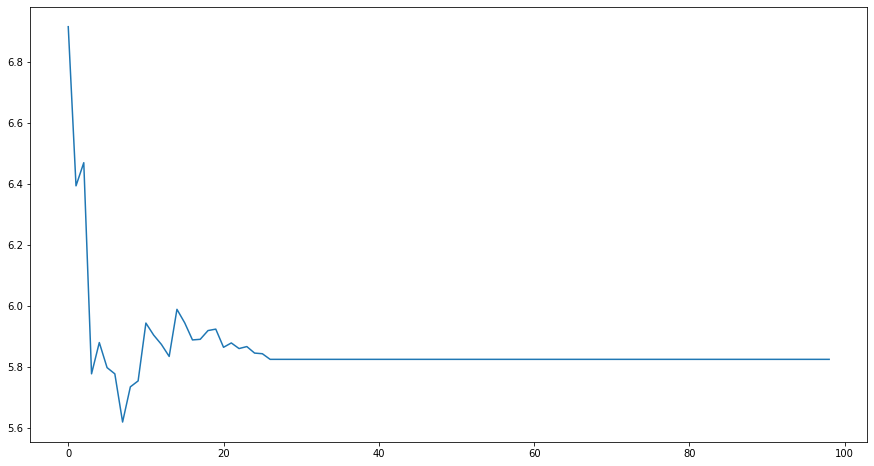

In [53]:
x_axis=np.arange(len(ABLR_BE))
plt.plot(x_axis,ABLR_BE)

In [61]:
np.argmin(ABLR_BE)

4

In [62]:
AB_bias=[]
for n in np.arange(1,150):
  AB=AdaBoostRegressor(n_estimators=n,random_state=0)
  scores=cross_val_score(AB,X_std,Y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  AB_bias.append(np.mean(rmse))

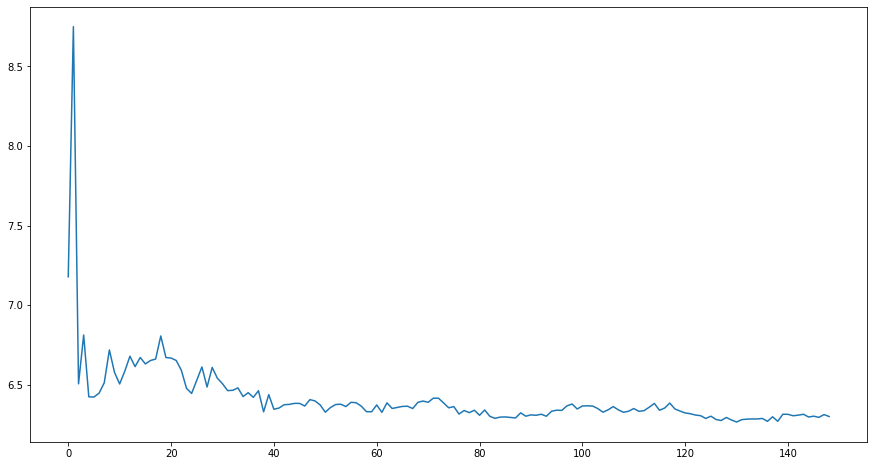

In [40]:
x_axis=np.arange(len(AB_bias))
plt.plot(x_axis,AB_bias)

In [41]:
np.argmin(AB_bias)

130

In [42]:
RF_tuned=RandomForestRegressor(criterion='mse',n_estimators=3,random_state=0)

In [43]:
ABRF_bias=[]
ABRF_var=[]
for n in np.arange(1,100):
  ABRF=AdaBoostRegressor(base_estimator=RF_tuned,n_estimators=n,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=2)
  scores=cross_val_score(ABRF,X_std,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  ABRF_bias.append(np.mean(rmse))
  ABRF_var.append(np.std(rmse,ddof=1))

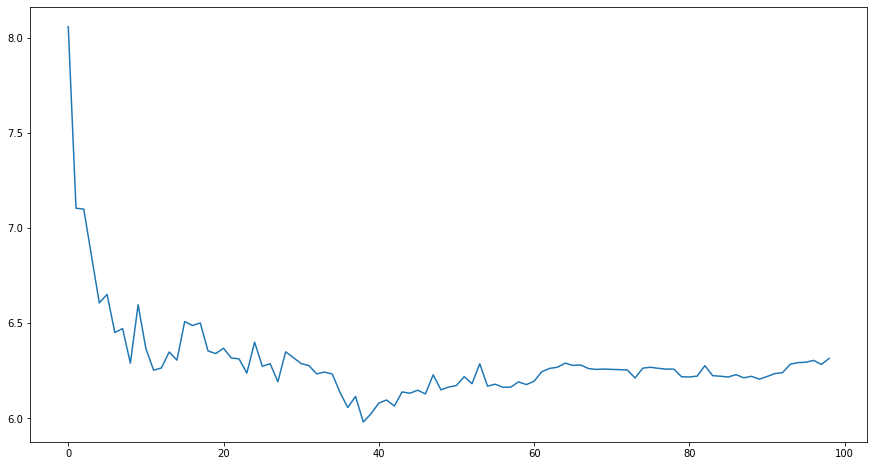

In [45]:
x_axis=np.arange(len(ABRF_bias))
plt.plot(x_axis,ABRF_bias)

In [47]:
np.argmin(ABRF_bias),np.min(ABRF_bias),ABRF_var[38]

(38, 5.980191507891412, 2.343440313150832)

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)

In [48]:
Bag_bias=[]
Bag_var=[]
for n in np.arange(1,100):
  Bag=BaggingRegressor(base_estimator=LR,n_estimators=n,random_state=0)
  scores=cross_val_score(Bag,X_std,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  Bag_bias.append(np.mean(rmse))
  Bag_var.append(np.std(rmse,ddof=1))

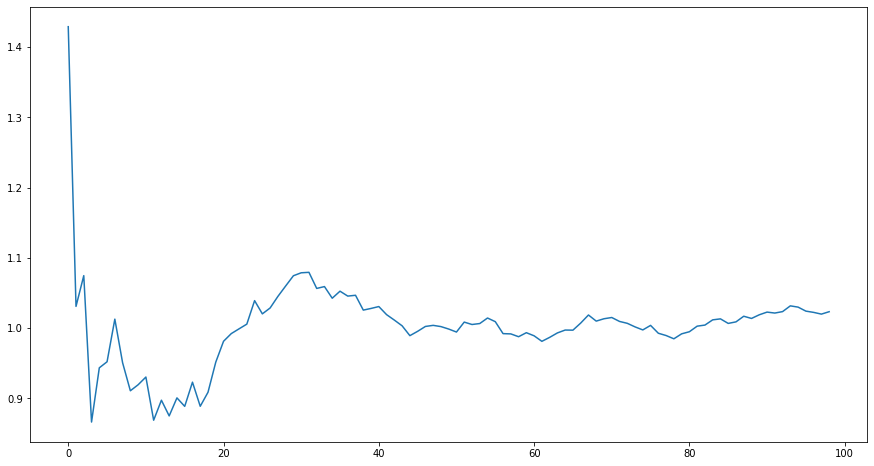

In [50]:
x_axis=np.arange(len(Bag_var))
plt.plot(x_axis,Bag_var)

In [139]:
A.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [152]:
# Remove the premium Segments and build a model
df1_premium=A[A['Price']>40]

In [153]:
df1_premium.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
11,Cadillac,Seville,Midsize,37.5,40.1,42.7,16,25,Driver & Passenger,Front,...,5,204,111,74,44,31.0,14.0,3935,USA,Cadillac Seville
48,Infiniti,Q45,Midsize,45.4,47.9,50.4,17,22,Driver only,Rear,...,5,200,113,72,42,29.0,15.0,4000,non-USA,Infiniti Q45
59,Mercedes-Benz,300E,Midsize,43.8,61.9,80.0,19,25,Driver & Passenger,Rear,...,5,187,110,69,37,27.0,15.0,3525,non-USA,Mercedes-Benz 300E


In [155]:
C=A.drop([11,48,59],axis=0)

In [157]:
C.shape

(90, 27)

In [158]:
d=C.select_dtypes(include=[np.number])

In [159]:
X=d.drop('Price',axis=1)
y=d['Price']
# Some preprocessing Required(Encoding,Including Significant Cols)

In [160]:
LR=LinearRegression()
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=3,shuffle=True,random_state=0) #explicit definition
rmse=cross_val_score(LR,X,y,cv=kf,scoring='neg_root_mean_squared_error')
rmse_avg=np.mean(np.abs(rmse))
rmse_sd=np.std(np.abs(rmse),ddof=1)
print('Bias_Error',rmse_avg)
print('Var_Error',rmse_sd)

Bias_Error 0.03245300677398308
Var_Error 0.004851152445732921


In [51]:
np.min(Bag_var),np.argmin(Bag_var)

(0.8663426982372638, 3)

In [ ]:
np.min(Bag_bias),np.argmin(Bag_bias),Bag_var[58]

(5.074089662178369, 58, 1.140983721505519)

In [ ]:
(5.08-5.07)/5.08

0.001968503937007832

In [ ]:
(1.14-1.11)/1.14

0.026315789473684043

In [33]:
from sklearn.model_selection import cross_val_score,KFold

In [34]:
RF_bias=[]
RF_var=[]
for n in np.arange(1,100):
  RF=RandomForestRegressor(criterion='mse',n_estimators=n,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=2)
  scores=cross_val_score(RF,X_std,Y,cv=kf,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  RF_bias.append(np.mean(rmse))
  RF_var.append(np.std(rmse,ddof=1))

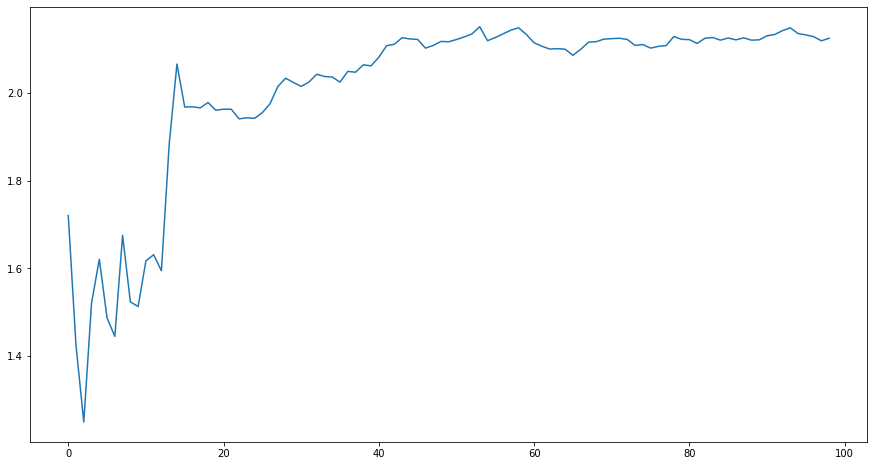

In [35]:
x_axis=np.arange(len(RF_var))
plt.plot(x_axis,RF_var)

In [38]:
np.argmin(RF_var),np.min(RF_var),RF_bias[2]

(2, 1.249247329646863, 6.455822473658756)

In [80]:
LR=LinearRegression()
knn_tuned=KNeighborsRegressor(n_neighbors=14,weights='distance')
LR_bag=BaggingRegressor(base_estimator=LR,n_estimators=4,random_state=0)
LR_AB=AdaBoostRegressor(base_estimator=LR,n_estimators=8,random_state=0)
RF_AB=AdaBoostRegressor(base_estimator=RF_tuned,n_estimators=139,random_state=0)
DT_AB=AdaBoostRegressor(n_estimators=131,random_state=0)
LR_GB=GradientBoostingRegressor(n_estimators=13,random_state=0)
RF_tuned=RandomForestRegressor(criterion='mse',n_estimators=3,random_state=0)
stacked = VotingRegressor(estimators = [('LR', LR),('Boosted_LR', LR_AB)])

In [81]:
models = []
models.append(('LinearRegression', LR))
models.append(('KNN',knn_tuned))
models.append(('BaggedLR',LR_bag))
models.append(('BoostedLR',LR_AB))
models.append(('BoostedRF',RF_AB))
models.append(('BoostedDT',DT_AB))
models.append(('GBoost',LR_GB))
models.append(('RF',RF_tuned))
models.append(('Stacked',stacked))

LinearRegression: 5.249720 (1.072713)
KNN: 6.764872 (2.402207)
BaggedLR: 5.504179 (0.994648)
BoostedLR: 5.701468 (0.718078)
BoostedRF: 6.031649 (2.014441)
BoostedDT: 6.318296 (2.088840)
GBoost: 6.364465 (2.100128)
RF: 6.888327 (2.750117)
Stacked: 5.408697 (0.882436)


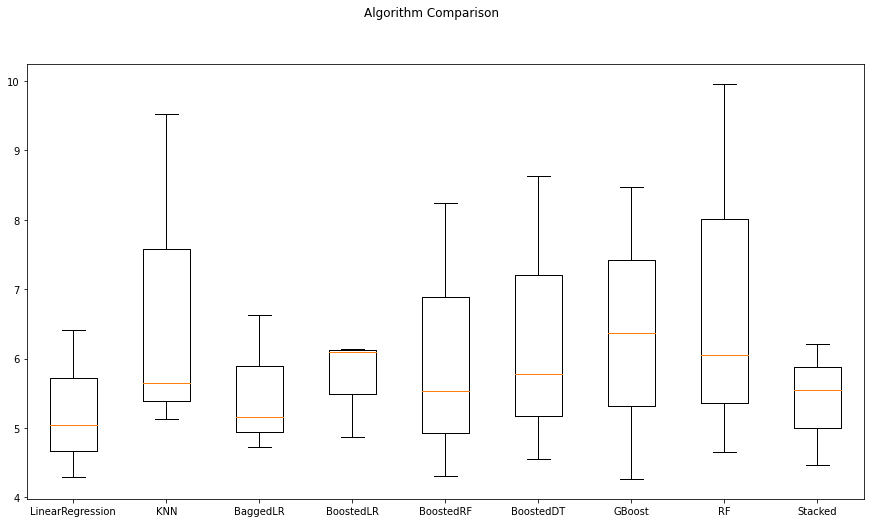

In [82]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [75]:
(5.408-5.348)/5.408

0.011094674556213109

In [76]:
(.990-.882)/.990

0.10909090909090907

In [ ]:
(4.237-4.190)/4.237

0.011092754307292826

In [ ]:
(0.481-.462)/.481

0.03950103950103942

In [ ]:
(0.873524-0.774534)/0.873524

0.11332258758774805

In [ ]:
(5.299592-5.218925)/5.299592

0.015221360436803446

In [ ]:
(5.746590-5.299592)/5.746590

0.07778491244372761

In [ ]:
#Final Inference
#5.746590 (0.559691)
#[$5187-$6305]

#3 datasets 
#glu  => 8.56, 2.45
#explore more models, =>4.23,.96


In [ ]:
(5.746590-5.297)/5.746590

0.07823596254474402

In [ ]:
(0.769845-0.5596)/0.7698

0.2731163938685373

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
knn=KNeighborsRegressor()
knn_params={'n_neighbors':np.arange(1,20),'weights':['uniform','distance']}

In [ ]:
GS=GridSearchCV(knn,knn_params,cv=3,scoring='neg_mean_squared_error')

In [ ]:
X_scaled=StandardScaler().fit_transform(X_new)

In [ ]:
GS.fit(X_scaled,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
GS.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
rmse_ve=[]
rmse_be=[]
for n in np.arange(1,50):
  KNN=KNeighborsRegressor(weights='distance',n_neighbors=n)
  kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
  mse=model_selection.cross_val_score(KNN,X_scaled,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  rmse_ve.append(np.std(rmse,ddof=1))
  rmse_be.append(np.mean(rmse))

In [ ]:
np.min(rmse_ve),np.argmin(rmse_ve),rmse_be[0]

(0.5950664644901348, 0, 6.532454581545693)

In [ ]:
np.min(rmse_be),np.argmin(rmse_be),rmse_ve[1]

(6.0815675666956315, 1, 1.6391681005372636)

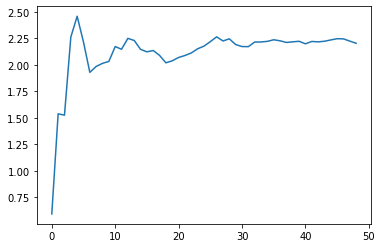

In [ ]:
x_axis=np.arange(len(rmse_ve))
plt.plot(x_axis,rmse_ve)

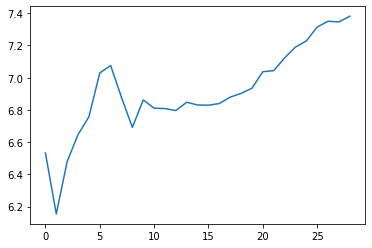

In [ ]:
x_axis=np.arange(len(rmse_be))
plt.plot(x_axis,rmse_be)

In [ ]:
np.argmin(rmse_be) #corresponding n_neigh=2, with be=6.15,ve=1.53
#choice-1: [$4620 to $7680]
#choice-2: [5940 to $7120]
#We go with choice-2,'coz we get 64.5% reduction in VE compared to m1 by
#trading off just 6% in the BE

1

In [ ]:
#RF Vs #KNN


In [ ]:
(1.53-0.59)/1.53

0.6143790849673203

In [ ]:
(6.53-6.15)/6.53

0.0581929555895865

In [ ]:
rmse_ve[0]   #with n_neigh=1, ve=0.59 wi=6.53th be

0.5950664644901348

In [ ]:
rmse_be[0]

6.532454581545693

In [ ]:
KNN=KNeighborsRegressor(n_neighbors=1)
RF=RandomForestRegressor(criterion='mse',n_estimators=10)

In [ ]:
models = []
models.append(('RandomForest', RF))
models.append(('KNN',KNN))

RandomForest: 6.459632 (1.325236)
KNN: 6.125137 (1.728460)


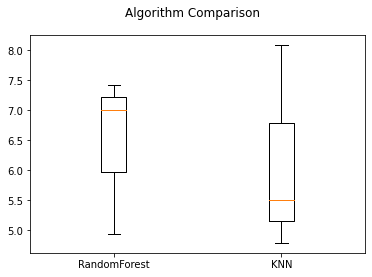

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_scaled, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)